# Soheil Shirvani &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Student Number: 862465192


<h2>Imports</h2>

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
df = breast_cancer_wisconsin_diagnostic.data.original
df

# ID feature is not usefull and Diagnose is our target
X = df.drop(["ID", "Diagnosis"], axis=1)

le = LabelEncoder()
y = pd.Series(le.fit_transform(df["Diagnosis"]))
# y = df["Diagnosis"]
print(type(y))

# Only 2 classes (binary classification)
print(np.unique(y))
display(y)
display(X)
print(X.describe())

<class 'pandas.core.series.Series'>
[0 1]


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         

# Implementing simple classifiers

## Decision Tree Classifier Implementation Overview

The `DecisionTreeClassifier` class is an implementation of a decision tree using Information Gain as the criterion for making splits. The tree is built using the ID3 algorithm, which begins with the root node and recursively partitions the data into subsets that correspond to the most discriminative features. The `fit` method initializes the tree construction by setting the most common class label in the dataset as the default class for predictions in scenarios where no further splitting is beneficial. It then calls the `_id3` function to start the recursive partitioning of the data based on Information Gain, calculated for each potential split.

Within the `_id3` method, the algorithm first checks if the maximum specified depth has been reached or if the data cannot be split further (i.e., all examples have the same class or there are no remaining attributes to split on). If any of these stopping conditions are met, the most common class label is returned. If not, the function iterates through each attribute and calculates the possible thresholds for splitting using the `_get_thresholds` method, which determines these values based on quantiles to handle continuous features effectively. The attribute and threshold that provide the highest Information Gain are selected to split the current node. The data is then partitioned into left and right subsets based on this best threshold, and the `_id3` function is called recursively for each subset, creating a tree structure represented as nested dictionaries.

## Evaluation of Decision Tree Performance

For evaluating the effectiveness of the `DecisionTreeClassifier`, the cross-validation approach is utilized. The `cross_validate` function from scikit-learn's model selection module is employed to assess the classifier's performance using the F1 score metric, which is particularly useful for datasets with imbalanced classes. The model is tested across multiple splits of the data, specified by the `StratifiedKFold` method, which ensures that each fold is a good representative of the whole by maintaining approximately the same percentage of samples of each class as in the complete set. This stratified sampling is crucial for evaluating the model fairly by preventing the model's performance from being biased by particular distributions of the classes. The average F1 score across all folds provides an indication of the classifier's generalization ability and robustness to new, unseen data.


In [4]:
class DecisionTreeClassifier(BaseEstimator):
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.default_class = None

    def fit(self, X, y):
        self.default_class = y.mode().iloc[0]
        self.tree_ = self._id3(X, y, depth=0)
        return self

    def predict(self, X):
        return X.apply(self._predict_instance, axis=1, args=(self.tree_,))

    def _predict_instance(self, instance, tree):
        if not isinstance(tree, dict):
            return tree
        attribute, threshold = next(iter(tree))
        if instance[attribute] <= threshold:
            return self._predict_instance(instance, tree[(attribute, threshold)]['left'])
        else:
            return self._predict_instance(instance, tree[(attribute, threshold)]['right'])

    def _id3(self, X, y, depth):
        if depth == self.max_depth or y.nunique() == 1 or X.empty:
            return y.mode().iloc[0]

        best_attribute, best_threshold, max_gain = None, None, -float('inf')
        for attribute in X.columns:
            thresholds = self._get_thresholds(X[attribute])
            for threshold in thresholds:
                gain = self._information_gain(X[attribute], y, threshold)
                if gain > max_gain:
                    max_gain, best_attribute, best_threshold = gain, attribute, threshold

        if max_gain == 0:
            return y.mode().iloc[0]

        left_idx = X[best_attribute] <= best_threshold
        right_idx = X[best_attribute] > best_threshold
        left_subtree = self._id3(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._id3(X[right_idx], y[right_idx], depth + 1)
        return {(best_attribute, best_threshold): {'left': left_subtree, 'right': right_subtree}}

    # def _get_thresholds(self, feature):
    #     sorted_vals = feature.sort_values().unique()
    #     print((sorted_vals[:-1] + sorted_vals[1:]) / 2)
    #     return (sorted_vals[:-1] + sorted_vals[1:]) / 2

    def _get_thresholds(self, feature, num_bins=10):
        # Use quantiles to determine thresholds
        quantiles = np.linspace(0, 1, num_bins + 1)[1:-1]
        thresholds = feature.quantile(quantiles).unique()
        return thresholds

    def _information_gain(self, feature, y, threshold):
        left = y[feature <= threshold]
        right = y[feature > threshold]
        prob_left = len(left) / len(y)
        prob_right = 1 - prob_left
        return self._entropy(y) - prob_left * self._entropy(left) - prob_right * self._entropy(right)

    def _entropy(self, s):
        counts = s.value_counts()
        probabilities = counts / counts.sum()
        return -np.sum(probabilities * np.log2(probabilities))

    def print_tree(self, node=None, indent=""):
        if node is None:
            node = self.tree_

        if not isinstance(node, dict):
            print(indent + str(node))
            return

        for (attribute, threshold), subtree in node.items():
            print(f"{indent}{attribute} <= {threshold}")
            self.print_tree(subtree['left'], indent + "  ")
            print(f"{indent}{attribute} > {threshold}")
            self.print_tree(subtree['right'], indent + "  ")




dt = DecisionTreeClassifier(max_depth=5)
# dt.fit(X, y)
# predicts = dt.predict(X)
# # # dt.print_tree()
# print(predicts)
# print(accuracy_score(y, predicts))
# print(f1_score(y, predicts))

skf = StratifiedKFold(n_splits=10)
test_score_dt = cross_validate(dt, X, y, scoring="f1", cv=skf)["test_score"]
test_score_dt

array([0.91304348, 0.85714286, 0.9       , 0.92682927, 0.95238095,
       0.93023256, 0.9       , 0.95238095, 0.86956522, 0.97560976])

In [5]:
test_score_dt.mean(), test_score_dt.std()

print(f"Decision Tree Performance is: {test_score_dt.mean()} +- {test_score_dt.std()}")

Decision Tree Performance is: 0.9177185040086716 +- 0.035541342038518726


## Gaussian Naive Bayes Classifier Implementation Overview

The `GaussianNaiveBayesClassifier` is a probabilistic classifier based on applying Bayes' theorem, with the assumption that the predictors follow a Gaussian distribution. Upon initialization, it prepares to store the means, standard deviations, and prior probabilities for each class. The `fit` method computes these parameters specifically for each class in the dataset. It calculates the mean and standard deviation of the features grouped by class, which represent the parameters of the Gaussian distribution for each feature within each class. Additionally, it computes the class prior probabilities based on the frequency of each class in the training data, essential for applying Bayes' theorem during prediction.

The `predict` method computes the log probabilities for each class using the Gaussian distribution's density function, where it sums the logarithm of the class prior probability and the log probabilities of each feature given the class. This approach of using log probabilities instead of direct probabilities helps in avoiding underflow issues, which are common in computations involving very small numbers. After calculating the log probabilities for each feature and class, the method determines the class with the highest probability for each instance. The classifier also includes a `predict_proba` method, which returns the normalized probabilities of each class for each instance, offering insights into the certainty of predictions.

## Evaluation of Gaussian Naive Bayes Performance

To evaluate the performance of the `GaussianNaiveBayesClassifier`, the model undergoes cross-validation using the `cross_validate` function with a stratified K-fold strategy. This technique involves dividing the dataset into `K` folds in a manner that each fold is a good representative of the entire dataset, maintaining a similar class proportion as in the original dataset. This method ensures that the evaluation is robust and less biased toward class distribution in the training data. The F1 score, which is particularly useful for evaluating models on imbalanced datasets as it balances the precision and recall, is used as the scoring metric. The average F1 score from the cross-validation provides a reliable measure of the classifier's ability to generalize to unseen data, highlighting its effectiveness in handling class imbalances and making it a viable choice for binary and multi-class classification problems.


In [6]:
class GaussianNaiveBayesClassifier(BaseEstimator):
    def __init__(self):
        self.means_ = None
        self.stds_ = None
        self.class_prior_ = None

    def fit(self, X, y):
        # Calculate means, stds, and class priors for each class
        self.means_ = X.groupby(y).mean()
        self.stds_ = X.groupby(y).std()
        self.class_prior_ = y.value_counts(normalize=True)
        return self

    def predict(self, X):
        # Calculate log probabilities for each class
        log_prob = self._calculate_log_probability(X)
        return log_prob.idxmax(axis=1)

    def _calculate_log_probability(self, X):
        log_prob = pd.DataFrame(index=X.index, columns=self.class_prior_.index)
        for c in self.class_prior_.index:
            log_class_prior = np.log(self.class_prior_.loc[c])
            log_feature_probs = 0
            for feature in X.columns:
                mean = self.means_.at[c, feature]
                std = self.stds_.at[c, feature]
                var = std ** 2 if std > 0 else 1e-6  # Avoid division by zero for zero variance
                log_feature_prob = -0.5 * np.log(2 * np.pi * var)
                log_feature_prob -= 0.5 * ((X[feature] - mean) ** 2 / var)
                log_feature_probs += log_feature_prob
            log_prob[c] = log_feature_probs + log_class_prior
        return log_prob

    def predict_proba(self, X):
        # Calculate log probabilities
        log_prob = self._calculate_log_probability(X)
        
        max_log_prob = log_prob.max(axis=1)
        log_prob = log_prob.sub(max_log_prob, axis=0)
        
        # Exponentiate the adjusted log probabilities
        prob = np.exp(log_prob)
        
        # Normalize probabilities so they sum to 1 for each row
        prob_sum = prob.sum(axis=1)
        normalized_prob = prob.div(prob_sum, axis=0)
        
        return normalized_prob


nb = GaussianNaiveBayesClassifier()
nb.fit(X, y)
predicts = nb.predict(X)
# probabilities = nb.predict_proba(X)

# dt.fit(X, y)
# # dt.print_tree()
# predicts = dt.predict(X)
# print(predicts)
print(accuracy_score(y, predicts))
print(f1_score(y, predicts))
predicts

skf = StratifiedKFold(n_splits=10)
test_score_nb = cross_validate(nb, X, y, scoring="f1", cv=skf)["test_score"]
test_score_nb

0.9402460456942003
0.9182692307692307


array([0.91304348, 0.84444444, 0.84210526, 0.9       , 0.9047619 ,
       0.97560976, 0.9       , 0.95238095, 0.86956522, 0.95      ])

In [7]:
test_score_nb.mean(), test_score_nb.std()

print(f"Naive Bayes Performance is: {test_score_nb.mean()} +- {test_score_nb.std()}")

Naive Bayes Performance is: 0.905191101649493 +- 0.04271817925398904


The bar plot visually compares the performance of two classifiers, Gaussian Naive Bayes and Decision Tree, based on their F1 scores derived from a cross-validation evaluation. Each classifier's average F1 score is represented as a bar, with error bars depicting the standard deviation of these scores across the different folds. This standard deviation serves as an indicator of the variability in the classifier's performance across different subsets of the data. In this comparison, the Decision Tree exhibits a slightly higher mean F1 score and lower variability, indicated by shorter error bars, suggesting more consistent performance across different test sets. Conversely, the Naive Bayes classifier, while achieving a competitive mean score, shows greater variability in its performance, as reflected by longer error bars. The maximum of the mean score plus the standard deviation for Naive Bayes even surpasses that of the Decision Tree, highlighting potential instances where Naive Bayes might outperform depending on the dataset's specific characteristics.

This graphical representation provides a clear, immediate understanding of how each classifier performs not only in terms of central tendency (mean) but also in terms of reliability and consistency (standard deviation). The plot underscores the importance of considering both the average performance and the consistency of that performance across different scenarios, assisting in making an informed choice about which classifier might be more appropriate for specific applications or under certain conditions where predictability and stability are crucial.

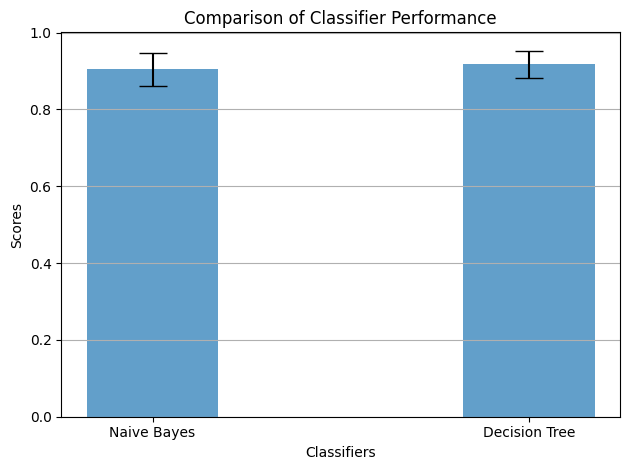

In [8]:
mean_scores = [np.mean(test_score_nb), np.mean(test_score_dt)]
std_scores = [np.std(test_score_nb), np.std(test_score_dt)]
classifiers = ['Naive Bayes', 'Decision Tree']

# Setting the positions and width for the bars
positions = np.arange(len(classifiers))
width = 0.35  # the width of the bars

# Plotting the bars
fig, ax = plt.subplots()
bar1 = ax.bar(positions, mean_scores, width, yerr=std_scores, align='center', alpha=0.7, ecolor='black', capsize=10, label='Test Scores')

# Adding some text for labels, title, and axes ticks
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classifier Performance')
ax.set_xticks(positions)
ax.set_xticklabels(classifiers)
ax.yaxis.grid(True)  # Add horizontal grid lines for better readability

# Save the figure and show the plot
plt.tight_layout()
plt.savefig('classifier_performance_comparison.png')
plt.show()

### Question 2: SVD

## Overview of SVD Implementation for Dimensionality Reduction

Singular Value Decomposition (SVD) is implemented here as a method of dimensionality reduction for a dataset characterized by a high number of variables. This technique decomposes the training data \(X_{\text{train}}\) into three matrices: \(U\), \(s\), and \(V^T\), where \(U\) and \(V^T\) are orthogonal matrices, and \(s\) is a diagonal matrix containing singular values. This reduction is pivotal for alleviating issues like model overfitting and excessive computational demand, common in high-dimensional datasets. The `reduce_dimensionality` function in the implementation selectively retains a specified number of dimensions, referred to as the 'rank'. This rank determines how much of the original data's information is preserved, reducing the dataset to its most significant features, thereby simplifying the data while attempting to retain the most discriminative information for analysis.

By projecting the training and testing data into this lower-dimensional space, the implementation facilitates a more focused and computationally efficient model training process. Each classifier's performance is then evaluated across various ranks to identify the optimal dimensionality that offers the best balance between model complexity and performance. The systematic evaluation uses cross-validation to measure model robustness and generalizability, assessing the F1 score across different subsamples. This approach not only provides insights into the effects of dimensionality reduction on different classifiers but also aids in selecting the appropriate complexity that maximizes predictive accuracy, as demonstrated in the function `evaluate_svd_ranks`, which empirically determines the best rank for maintaining effective performance metrics across varying model types.


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform SVD on the training data
U, s, Vt = np.linalg.svd(X_train, full_matrices=False)

# Function to reconstruct the data from the SVD with selected rank
def reduce_dimensionality(U, s, Vt, rank):
    S = np.diag(s[:rank])
    U_reduced = U[:, :rank]
    Vt_reduced = Vt[:rank, :]
    return U_reduced, S, Vt_reduced

# Example: Reduce to rank 3
rank = 3
U_reduced, S_reduced, Vt_reduced = reduce_dimensionality(U, s, Vt, rank)

# Project training data
X_train_reduced = np.dot(U_reduced, S_reduced)

# Project test data
X_test_reduced = np.dot(X_test, Vt_reduced.T) 
X_train_reduced.shape

(455, 3)

In [14]:
def evaluate_svd_ranks(X_train, y_train, X_test, y_test, ranks, classifiers):
    results = {name: [] for name in classifiers.keys()}

    # Compute SVD of the training data
    U, s, Vt = np.linalg.svd(X_train, full_matrices=False)

    for rank in ranks:
        # Reduce dimensionality
        U_reduced, S_reduced, Vt_reduced = reduce_dimensionality(U, s, Vt, rank)
        X_train_reduced = pd.DataFrame(np.dot(U_reduced, S_reduced), index=y_train.index)
        X_test_reduced = pd.DataFrame(np.dot(X_test, Vt_reduced.T), index=y_test.index)
        
        X = pd.concat([X_train_reduced, X_test_reduced]).reset_index(drop=True)
        y = pd.concat([y_train, y_test]).reset_index(drop=True)

        # Evaluate each classifier
        for name, clf in classifiers.items():
            # clf.fit(X_train_reduced, y_train)
            # predictions = clf.predict(X_test_reduced)
            # test_score = f1_score(y_test, predictions)
            
            skf = StratifiedKFold(n_splits=10)
            test_score = cross_validate(clf, X, y, scoring="f1", cv=skf)["test_score"]
            
            results[name].append((test_score.mean(), test_score.std()))
    
    return results

# Classifiers
classifiers = {
    'Naive Bayes': GaussianNaiveBayesClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Define ranks to test)
ranks = list(range(1, min(X_train.shape), 5))
results = evaluate_svd_ranks(X_train, y_train, X_test, y_test, ranks, classifiers)
results

{'Naive Bayes': [(0.8600873189395427, 0.06450391508635354),
  (0.8832691570666613, 0.05795758897940772),
  (0.8915009978718086, 0.05596535174962606),
  (0.8757671058877137, 0.06229825674213683),
  (0.8779420700004439, 0.05173993685839989),
  (0.8713360050172302, 0.04724257016254433)],
 'Decision Tree': [(0.8167565326378057, 0.09266661491007215),
  (0.9144770881929436, 0.05845740206084121),
  (0.9309866535000129, 0.024853001712346688),
  (0.9126986271632062, 0.022049277230388496),
  (0.9189616406355219, 0.033868633530027246),
  (0.9168474757306593, 0.033758768045215874)]}

## SVD Plot Overview
The plot illustrates the performance of various classifiers as a function of the Singular Value Decomposition (SVD) rank, using a dataset with dimensionality reduced through SVD. The x-axis of the plot represents different SVD ranks, while the y-axis measures the classifiers' accuracy. Each line represents a different classifier, with error bars indicating the standard deviation of the accuracy scores across different runs. The trend shown in the plot indicates that both classifiers initially benefit from an increase in SVD rank, with performance improvements observed up to a rank of approximately 10. Beyond this point, the classifiers exhibit a plateau or slight decrease in performance. This behavior suggests that while a moderate number of dimensions captures sufficient information for effective classification, further increasing the rank might introduce noise or redundant information that does not contribute to—or even detracts from—the classifiers' ability to generalize.

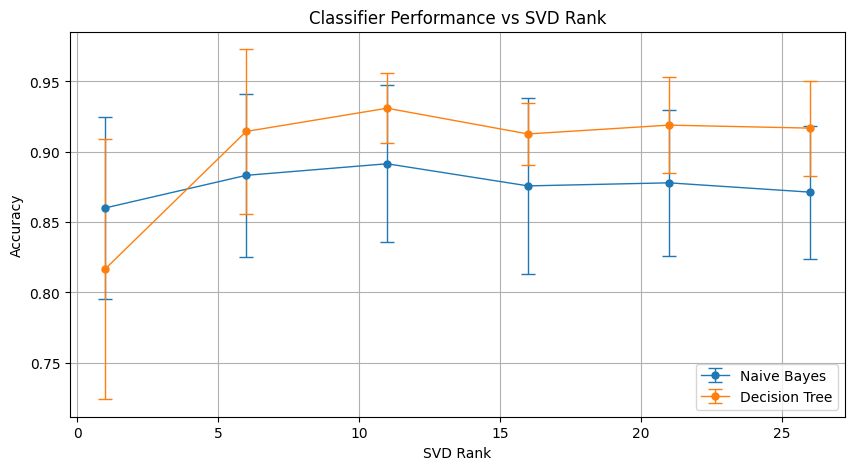

In [15]:
plt.figure(figsize=(10, 5))

for name, scores in results.items():
    means = [mean for mean, std in scores]
    stds = [std for mean, std in scores]

    # Plot with error bars
    plt.errorbar(ranks, means, yerr=stds, label=name, marker='o', capsize=5, linestyle='-', linewidth=1, markersize=5)

plt.xlabel('SVD Rank')
plt.ylabel('Accuracy')
plt.title('Classifier Performance vs SVD Rank')
plt.legend()
plt.grid(True)
plt.show()

### Question 3: Feature Selection

In the initial stage of the study, the dataset was split using a stratified method into a 20/80 ratio, with the smaller segment dedicated to assessing feature importance. This involved an innovative approach where each feature was subjected to a permutation test across two different classifiers: Naive Bayes and Decision Tree. For each feature, its values were randomized using np.permutation, and two models for each classifier were trained—one with the original feature set and another with one feature randomized. The performance of these models was evaluated through a 5-fold cross-validation, focusing on the F1 score to gauge accuracy. The mean F1 scores from the cross-validation were compared between the original and randomized data, with the resultant score differences serving as indicators of feature importance. Features causing significant drops in F1 scores upon randomization were considered more crucial, as their alteration notably degraded model performance.

In [12]:
# Split into feature selection set and holdout set
X_fs, X_holdout, y_fs, y_holdout = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)
print(len(X_fs), len(X_holdout))
print(np.unique(y_fs, return_counts=True), np.unique(y_holdout, return_counts=True))

classifiers = {
    "Naive Bayes": (GaussianNaiveBayesClassifier(), GaussianNaiveBayesClassifier()), 
    "Decision Tree": (DecisionTreeClassifier(), DecisionTreeClassifier())
}


# Initialize data structure to hold feature importance scores
feature_importance = pd.DataFrame(index=range(len(X.columns)), columns=classifiers.keys())

dt_score = pd.DataFrame(index=range(len(X.columns)), columns=["Regular", "Random", "Drop"])
nb_score = pd.DataFrame(index=range(len(X.columns)), columns=["Regular", "Random", "Drop"])


i = 0
for feature in X_fs.columns:
    # Initialize classifiers
    classifiers = {
        "Naive Bayes": GaussianNaiveBayesClassifier(), 
        "Decision Tree": DecisionTreeClassifier()
    }
    
    # if i >= 3:
    #     break
    # else:
    #     i += 1
        
    # Randomize the feature
    X_random = X_fs.copy()
    X_random[feature] = np.random.permutation(X_random[feature].values)

    print(f"Features {feature}")
    
    for name, clf in classifiers.items():
        # print(f"Classifier {name}")
        
        # Perform feature importance evaluation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
        
        # Cross-validate the original data
        # print(f"Regular Fit")
        original_scores = cross_val_score(clf, X_fs, y_fs, cv=skf, scoring="f1")
        # Cross-validate the randomized data
        # print(f"Random Fit")
        randomized_scores = cross_val_score(clf, X_random, y_fs, cv=skf, scoring="f1")

        
        # clf[0].fit(X_fs, y_fs)
        # predicts0 = clf[0].predict(X_holdout)
        # original_scores = f1_score(y_holdout, predicts0)   
        # clf[1].fit(X_random, y_fs)
        # predicts1 = clf[1].predict(X_holdout)
        # randomized_scores = f1_score(y_holdout, predicts1)
        
        # Calculate the importance (average score drop)
        score_drop = original_scores.mean() - randomized_scores.mean()
        
        # Store the result
        feature_importance.loc[X_fs.columns.get_loc(feature), name] = score_drop

        if name == "Naive Bayes":
            nb_score.loc[X_fs.columns.get_loc(feature), "Regular"] = f"{original_scores.mean():.3f} +- {original_scores.std():.3f}"
            nb_score.loc[X_fs.columns.get_loc(feature), "Random"] = f"{randomized_scores.mean():.3f} +- {randomized_scores.std():.3f}"
            nb_score.loc[X_fs.columns.get_loc(feature), "Drop"] = f"{randomized_scores.mean() - original_scores.mean():.3f}"
        else:
            dt_score.loc[X_fs.columns.get_loc(feature), "Regular"] = f"{original_scores.mean():.3f} +- {original_scores.std():.3f}"
            dt_score.loc[X_fs.columns.get_loc(feature), "Random"] = f"{randomized_scores.mean():.3f} +- {randomized_scores.std():.3f}"
            dt_score.loc[X_fs.columns.get_loc(feature), "Drop"] = f"{randomized_scores.mean() - original_scores.mean():.3f}"

    # print("\n")

# Rank features based on the average score drop
feature_importance['Average Importance'] = feature_importance.mean(axis=1)
feature_importance.sort_values(by='Average Importance', ascending=False, inplace=True)

# Output the feature importance
print(feature_importance.dropna())
print("Naive Bayes")
display(nb_score.dropna())
print("Decision Tree")
display(dt_score.dropna())

113 456
(array([0, 1]), array([71, 42], dtype=int64)) (array([0, 1]), array([286, 170], dtype=int64))
Features radius1
Features texture1
Features perimeter1
Features area1
Features smoothness1
Features compactness1
Features concavity1
Features concave_points1
Features symmetry1
Features fractal_dimension1
Features radius2
Features texture2
Features perimeter2
Features area2
Features smoothness2
Features compactness2
Features concavity2
Features concave_points2
Features symmetry2
Features fractal_dimension2
Features radius3
Features texture3
Features perimeter3
Features area3
Features smoothness3
Features compactness3
Features concavity3
Features concave_points3
Features symmetry3
Features fractal_dimension3
   Naive Bayes Decision Tree Average Importance
21     0.00915      0.012722           0.010936
11     0.00915       0.00915            0.00915
5          0.0      0.018211           0.009106
18         0.0      0.016077           0.008038
0     0.012865           0.0           0.00

,Regular,Random,Drop
0,0.906 +- 0.065,0.894 +- 0.081,-0.013
1,0.906 +- 0.065,0.897 +- 0.078,-0.009
2,0.906 +- 0.065,0.894 +- 0.081,-0.013
3,0.906 +- 0.065,0.894 +- 0.081,-0.013
4,0.906 +- 0.065,0.906 +- 0.065,0.000
5,0.906 +- 0.065,0.906 +- 0.065,0.000
6,0.906 +- 0.065,0.916 +- 0.058,0.009
7,0.906 +- 0.065,0.906 +- 0.065,0.000
8,0.906 +- 0.065,0.897 +- 0.078,-0.009
9,0.906 +- 0.065,0.906 +- 0.065,0.000


Decision Tree


,Regular,Random,Drop
0,0.836 +- 0.066,0.836 +- 0.066,0.000
1,0.836 +- 0.066,0.840 +- 0.065,0.004
2,0.836 +- 0.066,0.836 +- 0.066,0.000
3,0.836 +- 0.066,0.836 +- 0.066,0.000
4,0.836 +- 0.066,0.832 +- 0.064,-0.004
5,0.836 +- 0.066,0.818 +- 0.072,-0.018
6,0.836 +- 0.066,0.836 +- 0.066,0.000
7,0.836 +- 0.066,0.842 +- 0.045,0.006
8,0.836 +- 0.066,0.836 +- 0.066,0.000
9,0.836 +- 0.066,0.836 +- 0.066,0.000


# Plot Feature Importance

To visualize the outcomes of the feature selection process, a bar chart was plotted, displaying the features against their respective importance scores, sorted in descending order. This visual representation effectively highlighted the most significant features, making it clear which attributes most strongly influence the predictive accuracy of the models. Such graphical displays are instrumental in providing a clear and immediate understanding of feature relevance, helping guide further analyses and decision-making regarding model refinement.

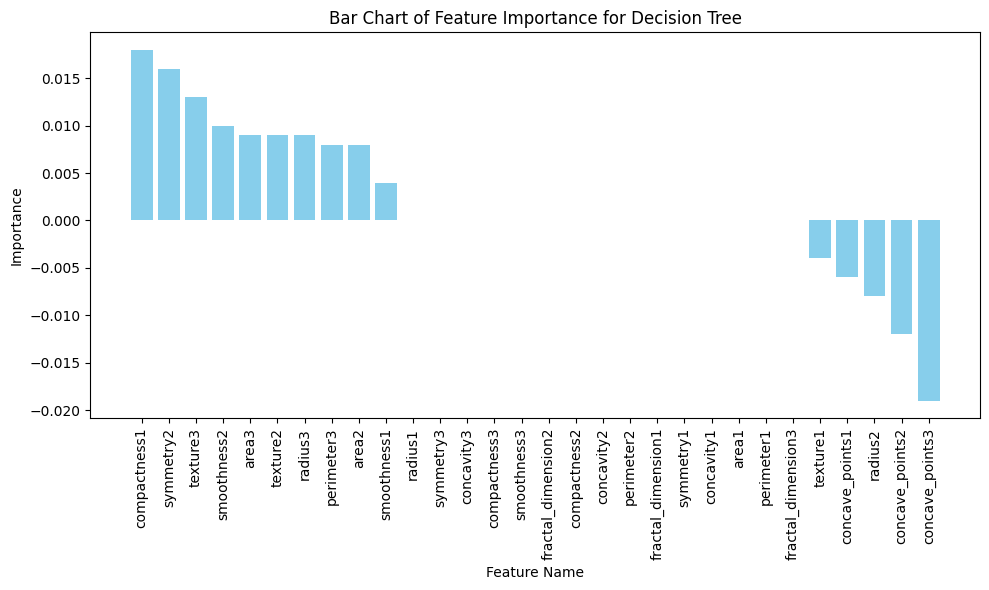

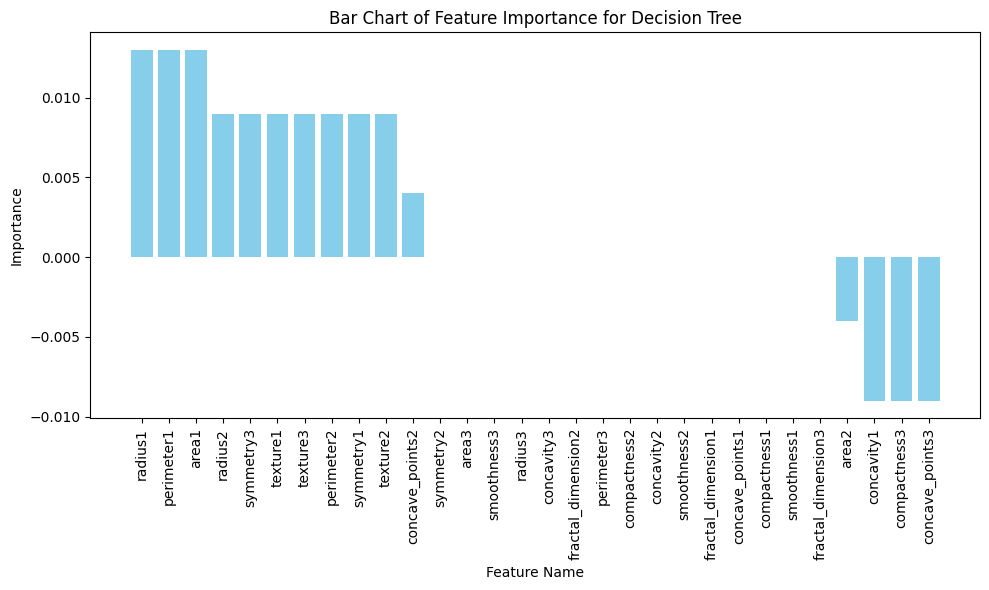

In [30]:
# dt_score["Drop"] = dt_score["Drop"].astype(float)
# dt_score.sort_values(by='Drop', ascending=True)

# Sorting the DataFrame by 'Drop' values
data = dt_score.copy()
data["Drop"] = data["Drop"].astype(float)
data["Drop"] = -data["Drop"]
sorted_dt = data.sort_values(by='Drop', ascending=False)
feature_names = X_fs.columns

# Retrieving feature names based on sorted indices
sorted_features = [feature_names[i] for i in sorted_dt.index]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_dt['Drop'], color='skyblue')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.title('Bar Chart of Feature Importance for Decision Tree')
plt.xticks(rotation=90)  # Rotates the feature names for better readability
plt.tight_layout()  # Adjusts subplots to give some padding and prevent overlap
plt.show()


# Sorting the DataFrame by 'Drop' values
data = nb_score.copy()
data["Drop"] = data["Drop"].astype(float)
data["Drop"] = -data["Drop"]
sorted_dt = data.sort_values(by='Drop', ascending=False)
feature_names = X_fs.columns

# Retrieving feature names based on sorted indices
sorted_features = [feature_names[i] for i in sorted_dt.index]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_dt['Drop'], color='skyblue')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.title('Bar Chart of Feature Importance for Decision Tree')
plt.xticks(rotation=90)  # Rotates the feature names for better readability
plt.tight_layout()  # Adjusts subplots to give some padding and prevent overlap
plt.show()

# Testing performance for hold out set (80%)

Following the feature selection, the remaining 80% of the dataset was utilized to validate the efficacy of the selected features in enhancing model performance. This phase of testing involved conducting a 10-fold stratified cross-validation on both classifiers, with each fold focusing sequentially on the top 1 to top 10 features as determined from the previous feature importance analysis. This methodical approach allowed for a detailed examination of how the inclusion of progressively more top features impacted the classifiers' performance, measured again by the F1 score.

In [41]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
classifiers = {
    "Naive Bayes": GaussianNaiveBayesClassifier(), 
    "Decision Tree": DecisionTreeClassifier()
}

data = nb_score.copy()
data["Drop"] = data["Drop"].astype(float)
data["Drop"] = -data["Drop"]
sorted_dt = data.sort_values(by='Drop', ascending=False)
feature_names = X_fs.columns

# Retrieving feature names based on sorted indices
nb_df = [feature_names[i] for i in sorted_dt.index]

data = dt_score.copy()
data["Drop"] = data["Drop"].astype(float)
data["Drop"] = -data["Drop"]
sorted_dt = data.sort_values(by='Drop', ascending=False)
feature_names = X_fs.columns

# Retrieving feature names based on sorted indices
dt_df = [feature_names[i] for i in sorted_dt.index]

data_both = {
    "Naive Bayes": nb_df, 
    "Decision Tree": dt_df
}

feature_names = X_holdout.columns

dt_scores_dict = {}
nb_scores_dict = {}
for name, clf in classifiers.items():
    for i in range(1, 11):
        print(f"Top {i} Feature for {name}")
        
        data = data_both[name].copy()
        top_features = data[:i]
        
        # Selecting the top N features for X_holdout
        X_holdout_reduced = X_holdout[top_features]
        
        # Cross-validate the original and randomized models
        scores = cross_val_score(clf, X_holdout_reduced, y_holdout, cv=10, scoring="f1")
        
        # Store the mean of the scores
        if name == "Decision Tree":
            dt_scores_dict[f'Top {i} features'] = f"{np.mean(scores)} +- {np.std(scores)}"
        if name == "Naive Bayes":
            nb_scores_dict[f'Top {i} features'] = f"{np.mean(scores)} +- {np.std(scores)}"

display(dt_scores_dict)
display(nb_scores_dict)

Top 1 Feature for Naive Bayes
Top 2 Feature for Naive Bayes
Top 3 Feature for Naive Bayes
Top 4 Feature for Naive Bayes
Top 5 Feature for Naive Bayes
Top 6 Feature for Naive Bayes
Top 7 Feature for Naive Bayes
Top 8 Feature for Naive Bayes
Top 9 Feature for Naive Bayes
Top 10 Feature for Naive Bayes
Top 1 Feature for Decision Tree
Top 2 Feature for Decision Tree
Top 3 Feature for Decision Tree
Top 4 Feature for Decision Tree
Top 5 Feature for Decision Tree
Top 6 Feature for Decision Tree
Top 7 Feature for Decision Tree
Top 8 Feature for Decision Tree
Top 9 Feature for Decision Tree
Top 10 Feature for Decision Tree


{'Top 1 features': '0.5960157366726758 +- 0.12310829135189863',
 'Top 2 features': '0.6118698545325472 +- 0.10897957974394472',
 'Top 3 features': '0.7178561903945735 +- 0.07716208997657627',
 'Top 4 features': '0.7164847386527807 +- 0.057963639473799906',
 'Top 5 features': '0.9042669304007045 +- 0.07598682041940975',
 'Top 6 features': '0.9057339887512301 +- 0.06228586782556994',
 'Top 7 features': '0.8882176000488015 +- 0.05334752770409954',
 'Top 8 features': '0.904840173761165 +- 0.05998128679985231',
 'Top 9 features': '0.904840173761165 +- 0.05998128679985231',
 'Top 10 features': '0.9187745878152855 +- 0.0615703046849362'}

{'Top 1 features': '0.816913554154491 +- 0.07023480326005216',
 'Top 2 features': '0.8247630376940721 +- 0.06834876405911244',
 'Top 3 features': '0.8287039243935796 +- 0.07117962657818419',
 'Top 4 features': '0.8244768665938043 +- 0.07371174814788302',
 'Top 5 features': '0.8536720661173878 +- 0.06303108160737945',
 'Top 6 features': '0.8761699119934413 +- 0.05396224849450478',
 'Top 7 features': '0.875815414066188 +- 0.059613534892242706',
 'Top 8 features': '0.871896313069082 +- 0.08347133297634193',
 'Top 9 features': '0.8688804400532089 +- 0.0813125509115552',
 'Top 10 features': '0.8688804400532089 +- 0.0813125509115552'}

# Plot top1 to top10 features perforamnce

The results from this extensive testing were meticulously compiled into two separate bar charts, one for each classifier. These charts illustrated the mean F1 scores and their standard deviations for each feature set, providing a statistical overview of performance consistency and variability across the folds. Such detailed visual documentation helps in comparing the robustness and reliability of the classifiers under different feature subset scenarios, ultimately offering insights into the optimal number of features required for the best model performance. This structured testing not only validates the selected features but also enhances understanding of the classifiers' behavior in practical scenarios.

n an analysis of the feature selection impact on model performance, the Decision Tree (DT) classifier demonstrated a consistent increase in F1 score as the number of top features considered increased from 1 to 10. This monotonic improvement is indicative of the DT's ability to leverage additional information from each subsequent feature effectively, culminating in an F1 score of 90% when restricted to the top 10 features. Comparatively, the full model, utilizing all available features, achieved a slightly higher score of 91%, demonstrating only a marginal benefit from including more than the top 10 features.

Conversely, the performance of the Naive Bayes (NB) classifier exhibited a less consistent pattern. While there was a steady increase in F1 score as more features were included, reaching its peak at the inclusion of the top 8 features, the F1 score slightly decreased when expanding from 8 to 10 features, settling at 87% for the top 10 features, compared to 90% with the full feature set. This observation suggests that for the NB classifier, adding more than the top 8 features does not contribute additional predictive value and may instead introduce noise or redundancy. These findings underscore the potential for significant computational efficiency gains in scenarios such as edge machine learning, where deploying models with reduced feature sets can achieve comparable performance with less computational demand and quicker inference times.

C:\Users\Soheil\AppData\Local\Temp\ipykernel_7988\3960771635.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(labels, means, yerr=errors, fmt='-o', capsize=5, capthick=2, ecolor='red', color='blue', marker='s')


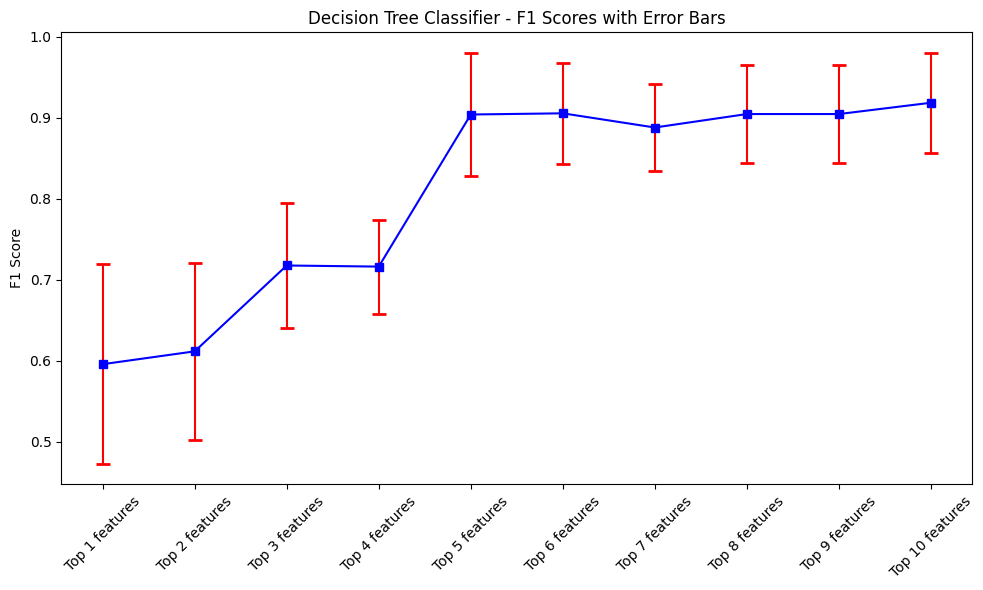

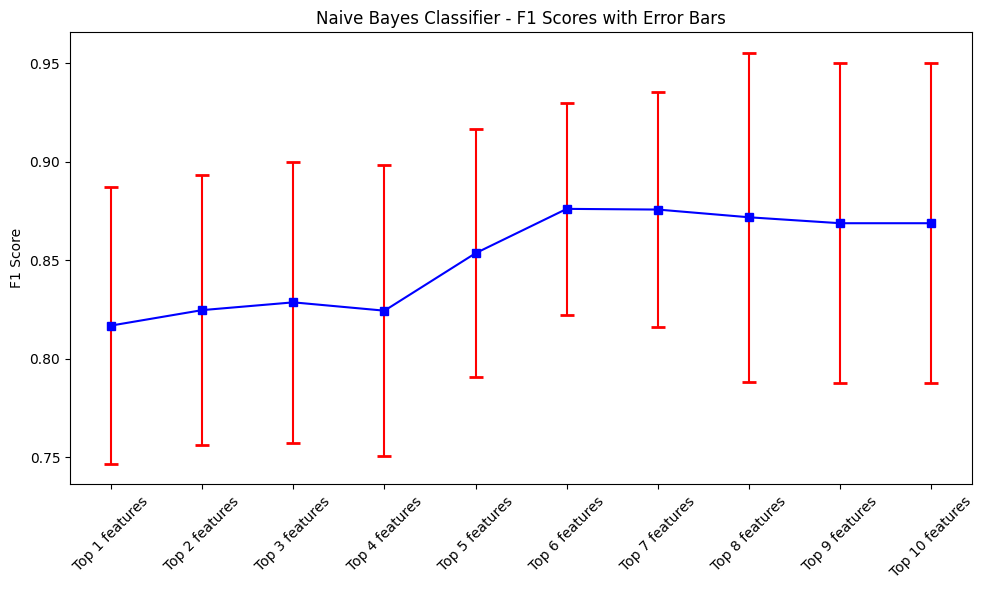

In [48]:
def plot_error_bars(data_dict, title):
    # Extract scores and errors
    means = []
    errors = []
    labels = list(data_dict.keys())
    
    for score in data_dict.values():
        mean, error = score.split(' +- ')
        means.append(float(mean))
        errors.append(float(error))
    
    # Create error bar plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(labels, means, yerr=errors, fmt='-o', capsize=5, capthick=2, ecolor='red', color='blue', marker='s')
    plt.xticks(rotation=45)
    plt.ylabel('F1 Score')
    plt.title(title)
    plt.tight_layout()  # Adjust subplots to give some padding and prevent overlap
    plt.show()

# Plotting for Decision Tree Classifier
plot_error_bars(dt_scores_dict, "Decision Tree Classifier - F1 Scores with Error Bars")

# Plotting for Naive Bayes Classifier
plot_error_bars(nb_scores_dict, "Naive Bayes Classifier - F1 Scores with Error Bars")

# Part 4: SMOTE

## SMOTE Implementation Overview

In the implementation of the Synthetic Minority Over-sampling Technique (SMOTE), the dataset undergoes strategic augmentation to address class imbalance, specifically to enhance the representation of the minority class. Initially, the minority class samples are shuffled if the oversampling percentage, \( N \), is specified to be less than 100%. This shuffling is critical as it randomizes the order of samples, ensuring that the selection process for generating new synthetic instances is not biased by any inherent ordering in the data. When \( N \) is less than 100%, it indicates that the increase in the minority class will be proportionate but will not double the dataset. The algorithm then calculates \( T \), the actual number of synthetic samples to generate, by scaling \( T \) according to \( N \). This scaling ensures that the generated synthetic samples are proportionate to the specified oversampling requirement, avoiding excessive data duplication which could lead to overfitting.

The process involves finding \( k \) nearest neighbors for each sample in the minority class to generate new synthetic instances. This neighbor-based sampling is crucial for preserving the information and distribution characteristics of the minority class. By interpolating between a minority class sample and its neighbors, SMOTE creates new instances that are variations of existing ones, thus enriching the dataset's diversity while maintaining its intrinsic properties. These steps collectively enhance the dataset's quality, preparing it for more effective training of machine learning models. The model evaluation then follows, using a split of the original dataset into training and test sets, ensuring both representativeness and integrity in measuring the model’s performance against unseen data. This rigorous evaluation setup, coupled with SMOTE's intelligent oversampling, aims to build models that are both robust and fair, mitigating the typical biases associated with imbalanced datasets.


In [17]:
def SMOTE(T, N, k, X_minority):
    num_samples, num_attrs = X_minority.shape
    new_samples = []
    
    # Step 2-6: Randomize the minority class samples if N < 100%
    if N < 100:
        np.random.shuffle(X_minority)
        T = int((N/100) * T)
        N = 100
    
    N = int(N / 100)  # Step 7: Convert N to integer
    
    for i in range(T):
        nn_array = find_k_nearest_neighbors(X_minority, i, k)
        new_samples.extend(populate(N, i, nn_array, X_minority))
    
    return np.array(new_samples)

def find_k_nearest_neighbors(X, sample_index, k):
    distances = np.linalg.norm(X - X.iloc[sample_index], axis=1)
    nearest_neighbors = np.argsort(distances)[1:k+1] # exclude itself
    return nearest_neighbors

def populate(N, sample_index, nn_array, X_minority):
    num_attrs = X_minority.shape[1]
    synthetic_samples = []
    
    while N != 0:
        nn = np.random.randint(0, len(nn_array))
        dif = X_minority.iloc[nn_array[nn]] - X_minority.iloc[sample_index]
        gap = np.random.random()
        synthetic_sample = X_minority.iloc[sample_index] + gap * dif
        synthetic_samples.append(synthetic_sample)
        N -= 1
    
    return synthetic_samples

## Evaluation of SMOTE Enhanced Classifiers

The evaluation of the classifiers augmented with SMOTE involves splitting the dataset into training and testing subsets using a 70:30 ratio, controlled by a fixed random state for reproducibility. This initial partition ensures that both subsets reflect the overall distribution of the data. After splitting, the training set indices are reset to maintain data integrity, crucial for operations that may rely on the DataFrame index such as data concatenation.

The effectiveness of SMOTE in dealing with class imbalance is tested across varying configurations of oversampling percentages (`N_values`) and the number of nearest neighbors (`k_values`). For each configuration, the SMOTE algorithm is applied only if `N` is greater than 0, indicating an intention to augment the minority class by generating synthetic samples. These samples are integrated into the original training set, forming an augmented training set that is then used to train the specified classifiers: Naive Bayes and Decision Trees.

For each classifier and parameter configuration, the model is trained on the augmented data (if applicable) and evaluated on the unchanged test set using the F1 score. This metric is chosen for its


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
print(len(X_train), len(X_test))
print(np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True))
# print(len(X_train[y_train == 1]))

N_values = [0, 100, 200, 300]  # Percentage of oversampled minority samples
k_values = [1, 5]  # Number of nearest neighbors
classifiers = {
    "Naive Bayes": (GaussianNaiveBayesClassifier(), GaussianNaiveBayesClassifier()), 
    "Decision Tree": (DecisionTreeClassifier(), DecisionTreeClassifier())
}

results = {}

for classifier_name, (classifier_k1, classifier_k5) in classifiers.items():
    for N in N_values:
        for k in k_values:
            if (classifier_name, N, k) not in results:
                results[(classifier_name, N, k)] = []

            # Apply SMOTE if N > 0
            # print(len(X_train[y_train == 1]), N, k, X_train[y_train == 1])
            if N > 0:
                X_train_resampled = np.vstack([X_train, SMOTE(len(X_train[y_train == 1]), N, k, X_train[y_train == 1])])
                y_train_resampled = np.hstack([y_train, np.full(len(X_train_resampled) - len(X_train), 1)])
                
                X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
                y_train_resampled = pd.Series(y_train_resampled)

                classifier = classifier_k1 if k == 1 else classifier_k5
                classifier.fit(X_train_resampled, y_train_resampled)
            else:
                classifier = classifier_k1 if k == 1 else classifier_k5
                classifier.fit(X_train, y_train)

            # Predict and evaluate on test set
            y_pred = classifier.predict(X_test)
            f1_performance = f1_score(y_test, y_pred)
            results[(classifier_name, N, k)].append(f1_performance)
            
results

398 171
(array([0, 1]), array([249, 149], dtype=int64)) (array([0, 1]), array([108,  63], dtype=int64))


{('Naive Bayes', 0, 1): [0.912],
 ('Naive Bayes', 0, 5): [0.912],
 ('Naive Bayes', 100, 1): [0.9193548387096775],
 ('Naive Bayes', 100, 5): [0.9193548387096775],
 ('Naive Bayes', 200, 1): [0.9193548387096775],
 ('Naive Bayes', 200, 5): [0.9193548387096775],
 ('Naive Bayes', 300, 1): [0.9279999999999999],
 ('Naive Bayes', 300, 5): [0.9268292682926829],
 ('Decision Tree', 0, 1): [0.9279999999999999],
 ('Decision Tree', 0, 5): [0.9279999999999999],
 ('Decision Tree', 100, 1): [0.923076923076923],
 ('Decision Tree', 100, 5): [0.9133858267716536],
 ('Decision Tree', 200, 1): [0.9448818897637795],
 ('Decision Tree', 200, 5): [0.9206349206349206],
 ('Decision Tree', 300, 1): [0.9051094890510948],
 ('Decision Tree', 300, 5): [0.8970588235294118]}

## SMOTE Impact on Classifier Performance

In the visual representation of model performance, two classifiers—Naive Bayes and Decision Tree—are evaluated across different configurations of SMOTE percentages, specifically examining how variations in \( k \), the number of nearest neighbors used in SMOTE, affect their performance. The x-axis represents the SMOTE percentage, ranging from 0% (no oversampling) to 300%, indicating progressively greater levels of minority class oversampling. The y-axis measures the F1 score, a balanced metric that accounts for both precision and recall, providing a comprehensive view of classifier performance in the context of class imbalance. The plot includes four lines, each corresponding to a combination of classifier type and \( k \) value: Naive Bayes with \( k=1 \) and \( k=5 \), and Decision Tree with \( k=1 \) and \( k=5 \). Each point on these lines is marked with a circle, visually indicating the F1 score at each specified SMOTE level.

For the Naive Bayes classifier, an increase in SMOTE percentage generally improves performance slightly for both \( k=1 \) and \( k=5 \), with no significant difference between these two configurations. This uniformity in performance enhancement can be attributed to Naive Bayes' inherent assumption of feature independence, which may not fully leverage the increased variance introduced by using different numbers of nearest neighbors in SMOTE. In contrast, the Decision Tree classifier shows a significant improvement in performance as the SMOTE percentage increases up to 200%, particularly for \( k=1 \), where the algorithm is likely benefiting from a clearer, less noisy signal in the minority class representation. However, beyond 200% SMOTE, performance declines, especially at 300%, which could be due to overfitting caused by too many synthetic samples that may not accurately represent the complexity of the underlying data distribution. The superior performance of \( k=1 \) over \( k=5 \) in Decision Trees suggests that fewer neighbors help maintain the diversity of the synthetic samples, providing more effective decision boundaries without the dilution of class characteristics that might occur when more neighbors are involved.


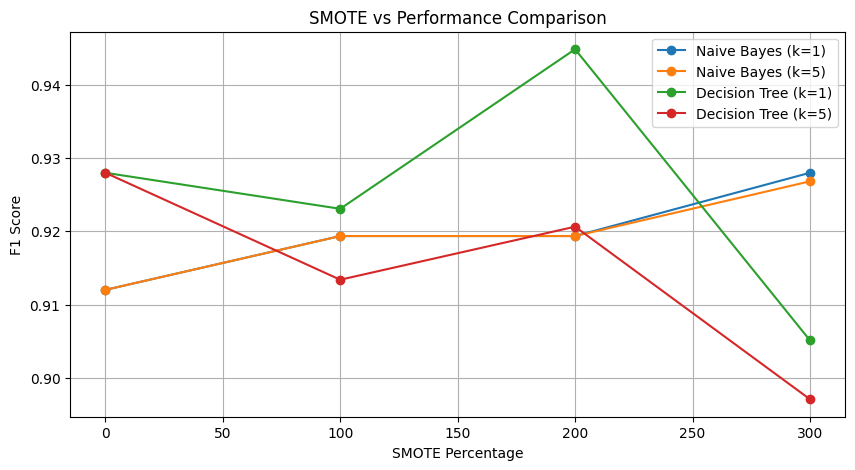

In [30]:
# Splitting data for plotting
x_vals = sorted(set([x[1] for x in results]))
nb_k1 = [results[x][0] for x in results if x[0] == 'Naive Bayes' and x[2] == 1]
nb_k5 = [results[x][0] for x in results if x[0] == 'Naive Bayes' and x[2] == 5]
dt_k1 = [results[x][0] for x in results if x[0] == 'Decision Tree' and x[2] == 1]
dt_k5 = [results[x][0] for x in results if x[0] == 'Decision Tree' and x[2] == 5]


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_vals, nb_k1, label='Naive Bayes (k=1)', marker='o')
plt.plot(x_vals, nb_k5, label='Naive Bayes (k=5)', marker='o')
plt.plot(x_vals, dt_k1, label='Decision Tree (k=1)', marker='o')
plt.plot(x_vals, dt_k5, label='Decision Tree (k=5)', marker='o')

plt.title('SMOTE vs Performance Comparison')
plt.xlabel('SMOTE Percentage')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()